# Using Waggle to Interact with Microphone

---

## Record audio

Records in "interval" seconds for "length" seconds for an "amount" number of audio files, and stores them in the `audio_files` directory labeled as "audioSample{x}.wav". The save function can save in multiple formats 

In [1]:
from waggle.data.audio import Microphone
import time

using backwards compatible implementation of time_ns


In [2]:
amount = 2 # how many times the microphone should record
interval = 5 # the pause in seconds between each recording
length = 10 # how long the microphone should record

In [3]:
microphone = Microphone()

num = 0
while True:
    
    if num == amount:
        break
        
    sample = microphone.record(length)
    sample.save(f"audio_files/audioSample{num}.wav")
    time.sleep(interval)
        
    num += 1

## Access audio data
Accessing audio with the Waggle platform is more convenient when it's multiple files within a directory. Otherwise, see the instructions in the `ReadRecordAudio.ipynb` notebook for a singular file.

The code below returns the data, timestamp, and samplerate of all audio files within the `audio_files` directory, and it also graphs that data. For the sake of comparing different bit types, I included reading a file using the `wavfile` program. Notice that using `wavfile.read()` outputs different data values than accessing a file with the Waggle platform. This is because `wavfile.read()` outputs integer type. pywaggle uses floating point type, but there's no substantial difference except that floating point type can be easier to interpret, as seen by the graphs
* Ultimately, any functionality/code with the `scipy.io` package is optional and not required for working with audio using Waggle
* This also goes for graphing the data using `matplotlib.pyplot` and `numpy`

In [4]:
from waggle.data.audio import AudioFolder
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

samplerate: 48000 
timestamp: 1631651891028584235 
data in integer type: [-2112 -2140 -2272 ...  1633  3264  4354]


samplerate: 48000 
timestamp: 1631651891028584235 
data in floating point type: [[-0.06445312]
 [-0.06530762]
 [-0.06933594]
 ...
 [ 0.04983521]
 [ 0.09960938]
 [ 0.13287354]]




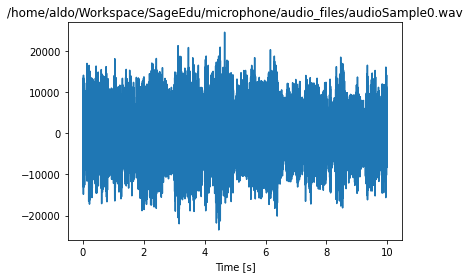

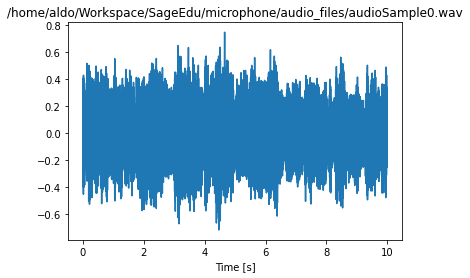

samplerate: 48000 
timestamp: 1631651907000884569 
data in integer type: [ -1974  -2045  -2026 ... -27821 -27825 -27827]


samplerate: 48000 
timestamp: 1631651907000884569 
data in floating point type: [[-0.0602417 ]
 [-0.06240845]
 [-0.06182861]
 ...
 [-0.84902954]
 [-0.84915161]
 [-0.84921265]]




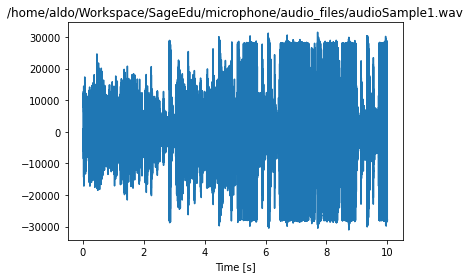

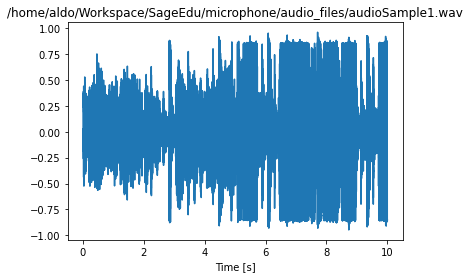

samplerate: 44100 
timestamp: 1630959711160926150 
data in integer type: [[  80   80]
 [  72   72]
 [  56   56]
 ...
 [3712 3712]
 [3288 3288]
 [1564 1564]]


samplerate: 44100 
timestamp: 1630959711160926150 
data in floating point type: [[0.00244141 0.00244141]
 [0.00219727 0.00219727]
 [0.00170898 0.00170898]
 ...
 [0.11328125 0.11328125]
 [0.1003418  0.1003418 ]
 [0.04772949 0.04772949]]




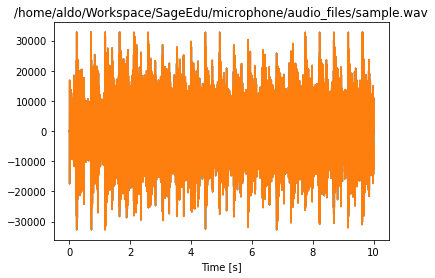

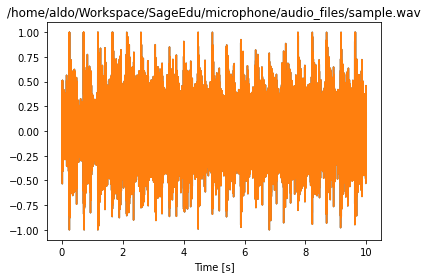

samplerate: 44100 
timestamp: 1630959711304925018 
data in integer type: [[416  62]
 [249  24]
 [200 -36]
 ...
 [  0   0]
 [  0   0]
 [  0   0]]


samplerate: 44100 
timestamp: 1630959711304925018 
data in floating point type: [[ 0.01269531  0.00189209]
 [ 0.00759888  0.00073242]
 [ 0.00610352 -0.00109863]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]




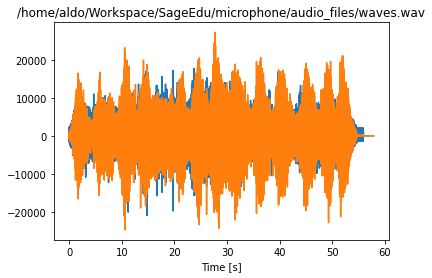

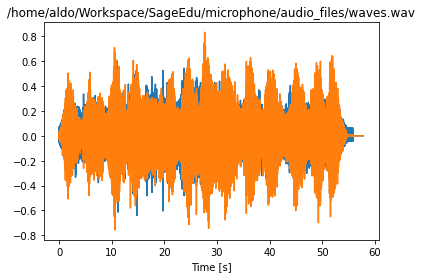

In [5]:
dataset = AudioFolder("audio_files") # desired directory
x = 0
for sample in dataset:
    link = str(dataset.files[x])
    (samplerate, data) = wavfile.read(dataset.files[x])
    print(f'samplerate: {samplerate} \ntimestamp: {sample.timestamp} \ndata in integer type: {data}\n\n')
    print(f'samplerate: {sample.samplerate} \ntimestamp: {sample.timestamp} \ndata in floating point type: {sample.data}\n\n')
    time = np.arange(0, len(data) / samplerate, 1/samplerate)
    time2 = np.arange(0, len(sample.data) / sample.samplerate, 1/sample.samplerate)

    plt.figure(x)
    plt.title(link)
    plt.xlabel("Time [s]")
    plt.plot(time, data)
    plt.show()
    
    plt.figure(x)
    plt.title(link)
    plt.xlabel("Time [s]")
    plt.plot(time2, sample.data)
    plt.show()
    x += 1

**The graphed data above may not reflect your version when you run this notebook because the previously recorded audio files will not be the same as the ones used in this example.**

## Delete files
Optional: run the code below to delete the saved audio files from "**Record audio**" in the `audio_files` directory

In [6]:
import os

In [7]:
for x in range(amount):
    os.unlink(f"audio_files/audioSample{x}.wav")